In [1]:
import sys
sys.path.append('../../')

import h5py
import numpy as np
import pypostpiv as p3
import matplotlib.pyplot as plt

# Convert PIV vector fields from DaVis VC7 format

In [2]:
# load the first cam only
field1 = p3.convert_vc7('../datasets/jet-flow-planar',    0.01)[0]
field2 = p3.convert_vc7('../datasets/vortex-ring-planar', 0.01)[0]
field3 = p3.convert_vc7('../datasets/cylinder-planar',    0.01)[0]

# Store P3 vector fields as HDF5

In [3]:
field1.save('field1.h5')
field2.save('field2.h5')
field3.save('field3.h5')

# Load P3 vector fields from HDF5

In [4]:
A = p3.load('field3.h5')

# Field Class
- Fluid dynamics research mostly deals with fields
- For example: scalar field and vector fields
- Hence, the new "Field" class is designed to make operations with fields easier
- It inherits from numpy's ndarray without significant modifications
- It has a fixed number of dimensions as shown<br>
<img src="field.png" width="220" align="center"/>
- Numerical operations with the "Field" class are easy and intuitive
- For example:<br>
$ \vec{B}(x,y,t) = \left( \frac{\partial}{\partial y}A_0(x,y,t) - [\bar{A}_1(x,y)]^2, \frac{\partial}{\partial x}A_1(x,y,t) - [\bar{A}_0(x,y)]^2 \right) $
- Can be written in code as

In [5]:
A_mean_2 = A.fmean()**2
print(type(A.u(0).ddx()))
B = p3.vector(A.u(0).ddy() - A_mean_2.u(1), A.u(1).ddx() - A_mean_2.u(0))

<class 'pypostpiv.piv.Field2D'>


# Magnitude of mean velocity field

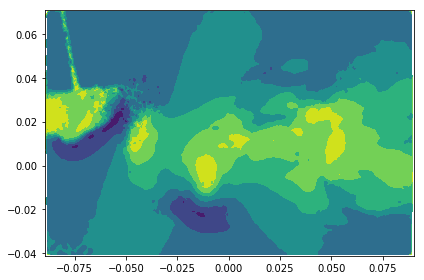

In [6]:
x,y,s = A.fmean().mag().get_value()
plt.contourf(x,y,s, cmap='viridis_r')
plt.tight_layout();

# Finite difference, 3 schemes available

(2, 288, 180, 10)
(288, 180)
(288, 180)
(288, 180)
(284, 176)
(284, 176)


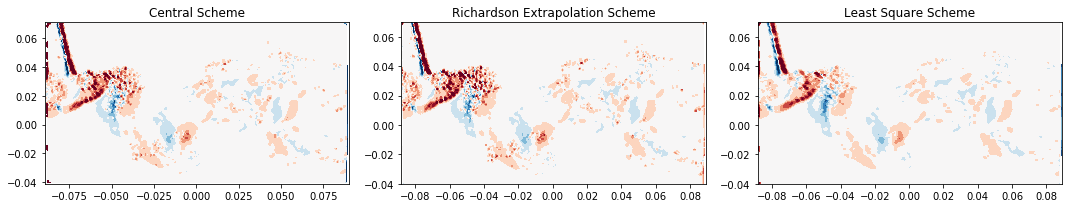

In [7]:
x1,y1,s1 = A.fmean().mag().ddx('central').get_value()
x2,y2,s2 = A.fmean().mag().ddx('richardson').get_value()
x3,y3,s3 = A.fmean().mag().ddx('least_square').get_value()

fig, axs = plt.subplots(1,3, figsize=(15,3))
axs[0].contourf(x1,y1,s1, cmap='RdBu_r', levels=np.arange(-5,5)*10+5, extend='both')
axs[0].set_title('Central Scheme')


axs[1].contourf(x2,y2,s2, cmap='RdBu_r', levels=np.arange(-5,5)*10+5, extend='both')
axs[1].set_title('Richardson Extrapolation Scheme')
axs[2].contourf(x3,y3,s3, cmap='RdBu_r', levels=np.arange(-5,5)*10+5, extend='both')
axs[2].set_title('Least Square Scheme')
plt.tight_layout();
print(A.shape)
print(x1.shape)
print(y1.shape)
print(s1.shape)
print(x2.shape)
print(x3.shape)

# Turbulence analysis

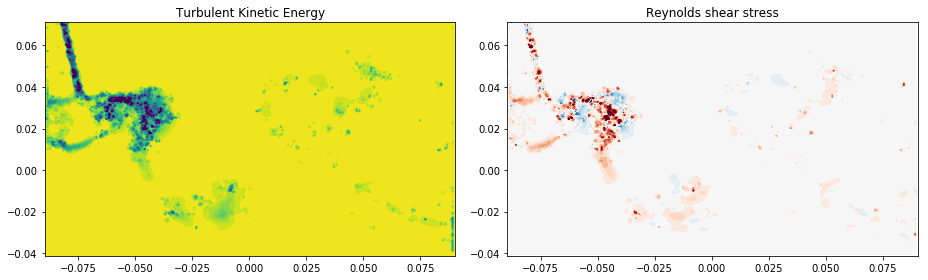

In [8]:
x1,y1,s1 = A.turbulent_kinetic_energy().get_value()
x2,y2,s2 = A.reynolds_shear_stress().get_value()

fig,axs = plt.subplots(1,2,figsize=(13,4))

axs[0].contourf(x1,y1,s1, cmap='viridis_r', levels=np.arange(21)*0.0005, extend='both')
axs[0].set_title('Turbulent Kinetic Energy')
axs[1].contourf(x2,y2,s2, cmap='RdBu_r', levels=(np.arange(-10,10)+0.5)*5e-4, extend='both')
axs[1].set_title('Reynolds shear stress')
plt.tight_layout();

# Vorticity analysis, 4 schemes available

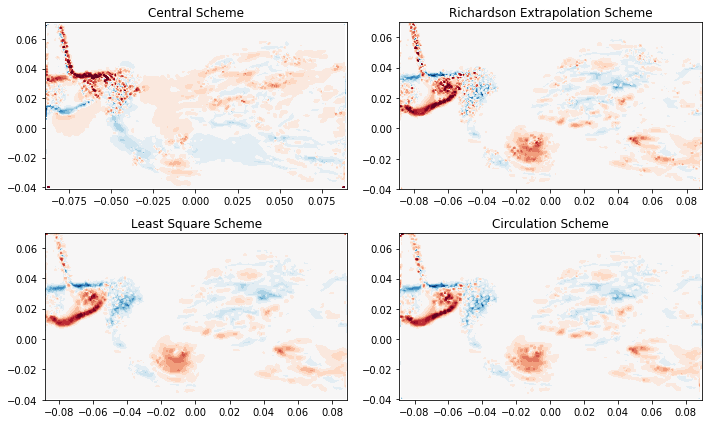

In [9]:
x1,y1,s1 = A.fmean().vorticity('central').get_value()
x2,y2,s2 = A.fmean().vorticity('richardson').get_value()
x3,y3,s3 = A.fmean().vorticity('least_square').get_value()
x4,y4,s4 = A.fmean().vorticity('circulation').get_value()

fig,axs = plt.subplots(2,2,figsize=(10,6))
axs[0,0].contourf(x1,y1,s1, cmap='RdBu_r', levels=(np.arange(-10,10)+0.5)*8, extend='both')
axs[0,0].set_title('Central Scheme')
axs[0,1].contourf(x2,y2,s2, cmap='RdBu_r', levels=(np.arange(-10,10)+0.5)*8, extend='both')
axs[0,1].set_title('Richardson Extrapolation Scheme')
axs[1,0].contourf(x3,y3,s3, cmap='RdBu_r', levels=(np.arange(-10,10)+0.5)*8, extend='both')
axs[1,0].set_title('Least Square Scheme')
axs[1,1].contourf(x4,y4,s4, cmap='RdBu_r', levels=(np.arange(-10,10)+0.5)*8, extend='both')
axs[1,1].set_title('Circulation Scheme')
plt.tight_layout();